## Decision Tree from Scratch

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       303 non-null    float64
 1   1       303 non-null    float64
 2   2       303 non-null    float64
 3   3       303 non-null    float64
 4   4       303 non-null    float64
 5   5       303 non-null    float64
 6   6       303 non-null    float64
 7   7       303 non-null    float64
 8   8       303 non-null    float64
 9   9       303 non-null    float64
 10  10      303 non-null    float64
 11  11      303 non-null    object 
 12  12      303 non-null    object 
 13  13      303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [6]:
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')

In [7]:
df.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','hd']
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## Missing Data: Identifying Missing Data

In [8]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
hd            int64
dtype: object

In [9]:
import seaborn as sns

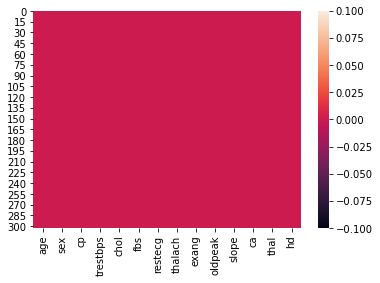

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.isnull().values.any()

False

In [12]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [13]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

## Missing Data: Dealing with missing value

In [14]:
df.loc[df['ca']=='?'] 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [15]:
df.loc[df['thal']=='?']

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2


In [16]:
len(df.loc[(df['ca']=='?')|(df['thal']=='?')])

6

In [17]:
len(df)

303

In [18]:
df_no_missing = df.loc[(df['ca']!='?')&(df['thal']!='?')]
df_no_missing

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


In [19]:
len(df_no_missing)

297

In [147]:
df_no_missing.to_csv(r'C:\Users\kamil\Excel Data\Udemy_Decision_Tree\HD.csv', header= True)

## Format Data Part 1 Split the Data into Dependent and Independent Variable

In [20]:
X = df_no_missing 
len(X)

297

In [21]:
y = df['hd']
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

## One-hot Encoder

In [22]:
# sex, cp, fbs, restecg, exang, slope, thal should be category variables so we have to use One-hot Encoder to change those data into more ML approach

In [23]:
#X['cp']
#pd.get_dummies(X, columns=['cp'])

In [24]:
X_encoded = pd.get_dummies(X, columns=['cp','restecg','exang','thal'])
X_encoded

,age,sex,trestbps,chol,fbs,thalach,oldpeak,slope,ca,hd,...,cp_3.0,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,exang_0.0,exang_1.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,2.3,3.0,0.0,0,...,0,0,0,0,1,1,0,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.5,2.0,3.0,2,...,0,1,0,0,1,0,1,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,2.6,2.0,2.0,1,...,0,1,0,0,1,0,1,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,3.5,3.0,0.0,0,...,1,0,1,0,0,1,0,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,1.4,1.0,0.0,0,...,0,0,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,140.0,241.0,0.0,123.0,0.2,2.0,0.0,1,...,0,1,1,0,0,0,1,0,0,1
298,45.0,1.0,110.0,264.0,0.0,132.0,1.2,2.0,0.0,1,...,0,0,1,0,0,1,0,0,0,1
299,68.0,1.0,144.0,193.0,1.0,141.0,3.4,2.0,2.0,2,...,0,1,1,0,0,1,0,0,0,1
300,57.0,1.0,130.0,131.0,0.0,115.0,1.2,2.0,1.0,3,...,0,1,1,0,0,0,1,0,0,1


## Format Data Split Part 2 -  Dependent Variable to [0,1]

In [143]:
x= []
for i in range(len(y)):
    
    if y[i] > 0:
        x.append(y.iloc[i]/y[i])
    else:
        x.append(y.iloc[i]/y[i])         
   
      

<ipython-input-143-936fb1213d53>:7: RuntimeWarning: invalid value encountered in longlong_scalars
  x.append(y.iloc[i]/y[i])


In [25]:
X_encoded

,age,sex,trestbps,chol,fbs,thalach,oldpeak,slope,ca,hd,...,cp_3.0,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,exang_0.0,exang_1.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,2.3,3.0,0.0,0,...,0,0,0,0,1,1,0,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.5,2.0,3.0,2,...,0,1,0,0,1,0,1,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,2.6,2.0,2.0,1,...,0,1,0,0,1,0,1,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,3.5,3.0,0.0,0,...,1,0,1,0,0,1,0,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,1.4,1.0,0.0,0,...,0,0,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,140.0,241.0,0.0,123.0,0.2,2.0,0.0,1,...,0,1,1,0,0,0,1,0,0,1
298,45.0,1.0,110.0,264.0,0.0,132.0,1.2,2.0,0.0,1,...,0,0,1,0,0,1,0,0,0,1
299,68.0,1.0,144.0,193.0,1.0,141.0,3.4,2.0,2.0,2,...,0,1,1,0,0,1,0,0,0,1
300,57.0,1.0,130.0,131.0,0.0,115.0,1.2,2.0,1.0,3,...,0,1,1,0,0,0,1,0,0,1


In [27]:
# Ilosc nie zerowych wartosci 'hd' = 137
X_encoded.loc[X_encoded['hd'] > 0,'hd'] 


1      1
2      1
6      1
8      1
9      1
      ..
297    1
298    1
299    1
300    1
301    1
Name: hd, Length: 137, dtype: int64

In [26]:
X_encoded.loc[X_encoded['hd'] > 0,'hd'] = 1
len(X_encoded.loc[X_encoded['hd'] > 0])

137

In [27]:
#X_encoded.loc[X_encoded['y_non_zero_value']==True]=1
#X_encoded.loc[X_encoded['y_non_zero_value']==False]=0

In [28]:
X_encoded

,age,sex,trestbps,chol,fbs,thalach,oldpeak,slope,ca,hd,...,cp_3.0,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,exang_0.0,exang_1.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,2.3,3.0,0.0,0,...,0,0,0,0,1,1,0,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.5,2.0,3.0,1,...,0,1,0,0,1,0,1,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,2.6,2.0,2.0,1,...,0,1,0,0,1,0,1,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,3.5,3.0,0.0,0,...,1,0,1,0,0,1,0,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,1.4,1.0,0.0,0,...,0,0,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,140.0,241.0,0.0,123.0,0.2,2.0,0.0,1,...,0,1,1,0,0,0,1,0,0,1
298,45.0,1.0,110.0,264.0,0.0,132.0,1.2,2.0,0.0,1,...,0,0,1,0,0,1,0,0,0,1
299,68.0,1.0,144.0,193.0,1.0,141.0,3.4,2.0,2.0,1,...,0,1,1,0,0,1,0,0,0,1
300,57.0,1.0,130.0,131.0,0.0,115.0,1.2,2.0,1.0,1,...,0,1,1,0,0,0,1,0,0,1


In [32]:
X = X_encoded.drop('hd', axis=1)
X

,age,sex,trestbps,chol,fbs,thalach,oldpeak,slope,ca,cp_1.0,...,cp_3.0,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,exang_0.0,exang_1.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,2.3,3.0,0.0,1,...,0,0,0,0,1,1,0,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.5,2.0,3.0,0,...,0,1,0,0,1,0,1,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,2.6,2.0,2.0,0,...,0,1,0,0,1,0,1,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,3.5,3.0,0.0,0,...,1,0,1,0,0,1,0,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,1.4,1.0,0.0,0,...,0,0,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,140.0,241.0,0.0,123.0,0.2,2.0,0.0,0,...,0,1,1,0,0,0,1,0,0,1
298,45.0,1.0,110.0,264.0,0.0,132.0,1.2,2.0,0.0,1,...,0,0,1,0,0,1,0,0,0,1
299,68.0,1.0,144.0,193.0,1.0,141.0,3.4,2.0,2.0,0,...,0,1,1,0,0,1,0,0,0,1
300,57.0,1.0,130.0,131.0,0.0,115.0,1.2,2.0,1.0,0,...,0,1,1,0,0,0,1,0,0,1


In [36]:
y = X_encoded['hd']
y


0      0
1      1
2      1
3      0
4      0
      ..
297    1
298    1
299    1
300    1
301    1
Name: hd, Length: 297, dtype: int64

## Build preliminary Decision Tree

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,train_size=0.50, random_state=0)

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

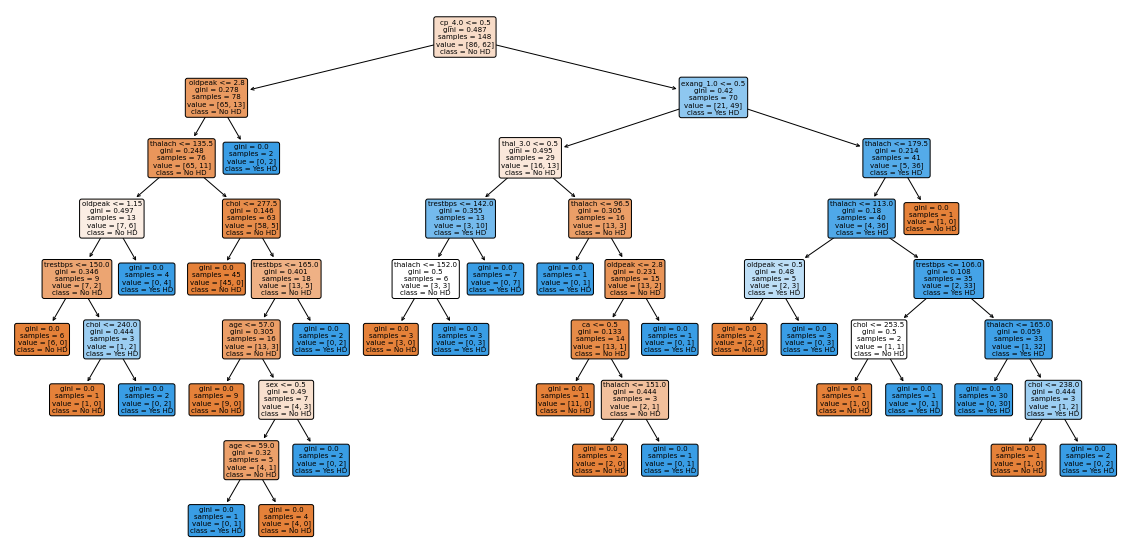

In [35]:
# ploting decision tree

plt.figure(figsize=(20, 10))

tree.plot_tree(clf_dt,
         filled=True,
         rounded=True,
         class_names=['No HD','Yes HD'],
         feature_names= X.columns)
plt.show()

In [64]:
# wiem czemu mi się drzewo decyzyjne zatrzymuje po jednym 
#brak klasyfikacji 149 

len(X_encoded['chol'])-86-62

149

In [68]:
# Drawing confusiion matrix plot

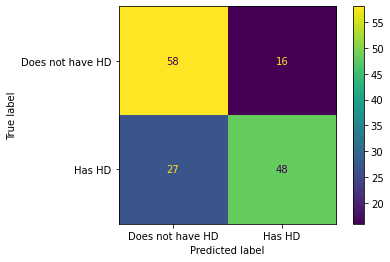

In [37]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["Does not have HD","Has HD"])

In [38]:
dir(clf_dt)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_prune_tree',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_X_predict',
 '_validate_data',
 'apply',
 'ccp_alpha',
 'class_weight',
 'classes_',
 'cost_complexity_pruning_path',
 'criterion',
 'decision_path',
 'feature_importances_',
 'fit',
 'get_depth',
 'get_n_leaves',
 'get_params',
 'max_depth',
 'max_features',
 'max_features_',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impurity_split',
 'min_samples_leaf',
 'min_sample

In [75]:
clf_dt.score(X,y)

0.8552188552188552

## Cost Complexity Pruning Part 1: Visalize alpha

In [41]:
path = clf_dt.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

clf_dts = []

#creating decision tree per value and store in the array

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)
  

### Now let's graph the accuracy of the trees using the Training Dataset and the Testing Datatset as a function od alpha

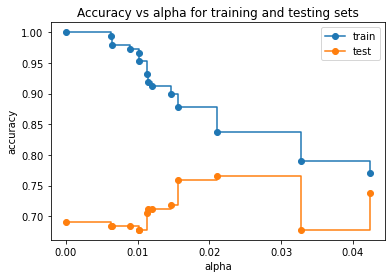

In [86]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores =  [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle='steps-post')
ax.legend()


### Cost Complexity Pruning Part 2: Cross Validation For Finnding the best Alpha parameter

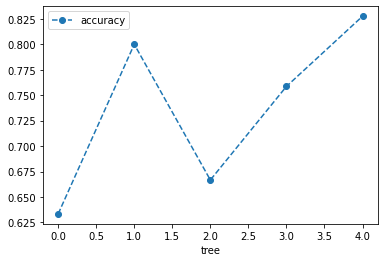

In [88]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.02)

scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
df = pd.DataFrame(data = {'tree': range(5), 'accuracy': scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle= '--')

In [89]:
# Wykres powyzej pokazuje że wartość alpha jest podatna na podział danych na czesc testowa i treningowa. Dlatego aby aby wybrac optymalny parametr alpha uzyjem cross validacji do znalezenia średniej wartości aplha z kazdego podzialu danych 

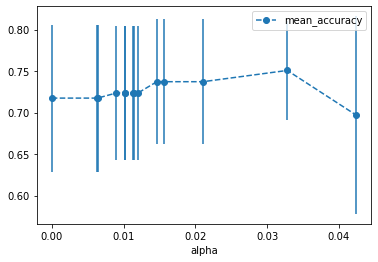

In [93]:
alpha_loop_values = []



for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
# MOzemy narysowac wykres dla wartosci sredniej warotsci i odchyleniu wartosciowego dla score dla kazdego podzialu danych     
    
alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha', 'mean_accuracy','std'])    
    
alpha_results.plot(x = 'alpha',
                 y='mean_accuracy',
                 yerr='std',
                 marker='o',
                 linestyle='--')    
    

In [94]:
alpha_results

,alpha,mean_accuracy,std
0,0.000000,0.717471,0.088643
1,0.006274,0.717471,0.088643
2,0.006371,0.717471,0.088643
3,0.009009,0.723678,0.080789
4,0.010135,0.723678,0.080789
5,0.010195,0.723678,0.080789
6,0.011282,0.723678,0.080789
7,0.011402,0.723678,0.080789
8,0.012012,0.723678,0.080789
9,0.014633,0.737241,0.075280


In [98]:
alpha_results.dtypes

alpha            float64
mean_accuracy    float64
std              float64
dtype: object

In [113]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.028)&(alpha_results['alpha'] < 0.036)]['alpha']
ideal_ccp_alpha

12    0.0328
Name: alpha, dtype: float64

In [115]:
ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

0.032800290343393795

## Building, Evaluating, Drawing and Interpreting the FInal Classification Tree

In [120]:
cft_dt_pruned = DecisionTreeClassifier(random_state= 42, ccp_alpha = ideal_ccp_alpha)
cft_dt_pruned = cft_dt_pruned.fit(X_train, y_train)

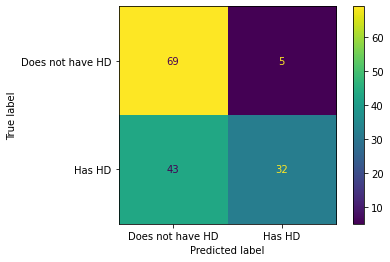

In [122]:
plot_confusion_matrix(cft_dt_pruned, X_test, y_test, display_labels= ["Does not have HD","Has HD"])

In [126]:
predictions = cft_dt_pruned.predict(X_test)

In [127]:
from sklearn.metrics import classification_report,confusion_matrix

In [128]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.62      0.93      0.74        74
           1       0.86      0.43      0.57        75

    accuracy                           0.68       149
   macro avg       0.74      0.68      0.66       149
weighted avg       0.74      0.68      0.66       149

